In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# **IBM HR Analytics Employee Turnover Prediction**

## **Problem Statement**

## **Task 02 | Employee Turnover Prediction:**
 - Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company.

### **DataSet:** [Employee Turnover Prediction](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

---

### **About Dataset:**
 - Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

 - Education
      1) 'Below College'   2) 'College'   3) 'Bachelor'   4) 'Master'   5) 'Doctor'

 - EnvironmentSatisfaction
     1) 'Low'   2) 'Medium'   3) 'High'   4) 'Very High'

 - JobInvolvement
     1) 'Low'  2) 'Medium'  3) 'High'  4) 'Very High'

 - JobSatisfaction
     1) 'Low'  2) 'Medium'  3) 'High'  4) 'Very High'

 - PerformanceRating
     1) 'Low'  2) 'Good'  3) 'Excellent'  4) 'Outstanding'

 - RelationshipSatisfaction
     1) 'Low'  2) 'Medium'  3) 'High'  4) 'Very High'

 - WorkLifeBalance
     1) 'Bad'  2) 'Good'  3) 'Better'  4) 'Best'

---

#### **Importing Libraries:**

In [ ]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

#### **Load the Dataset:**

In [ ]:
# load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### **set options to be maximum for rows and columns:**

In [ ]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 1: Data Cleaning and Preprocessing:**
  - #### **Display the first few rows of the dataset:**

In [ ]:
# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DailyRate'].plot(kind='hist', bins=20, title='DailyRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DistanceFromHome'].plot(kind='hist', bins=20, title='DistanceFromHome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('BusinessTravel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('EducationField').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Age', y='DailyRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='DailyRate', y='DistanceFromHome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='DistanceFromHome', y='Education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Education', y='EmployeeNumber', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attrition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attrition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BusinessTravel')):
  _plot_series(series, series_name, i)
  fig.legend(title='BusinessTravel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Department')):
  _plot_series(series, series_name, i)
  fig.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeCount']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('EmployeeCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('EducationField')):
  _plot_series(series, series_name, i)
  fig.legend(title='EducationField', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeCount')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['DailyRate'].plot(kind='line', figsize=(8, 4), title='DailyRate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['DistanceFromHome'].plot(kind='line', figsize=(8, 4), title='DistanceFromHome')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Education'].plot(kind='line', figsize=(8, 4), title='Education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BusinessTravel'].value_counts()
    for x_label, grp in _df_20.groupby('Attrition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Attrition')
_ = plt.ylabel('BusinessTravel')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Department'].value_counts()
    for x_label, grp in _df_21.groupby('BusinessTravel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BusinessTravel')
_ = plt.ylabel('Department')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EducationField'].value_counts()
    for x_label, grp in _df_22.groupby('Department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Department')
_ = plt.ylabel('EducationField')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_23.groupby('EducationField')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EducationField')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Attrition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Age', y='Attrition', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['BusinessTravel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Age', y='BusinessTravel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Age', y='Department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['EducationField'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Age', y='EducationField', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 - #### **Dataset Information:**

In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **Shape of the dataset:**

In [ ]:
# Shape of the dataset
print("Shape of the dataset:",df.shape)

Shape of the dataset: (1470, 35)


 - #### **Dataset Columns:**

In [ ]:
# DataSet columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

 - #### **Summary Statistics**

In [ ]:
# Summary Statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 - #### **Check for missing values:**

In [ ]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 - #### **Create a heatmap of missing values:**

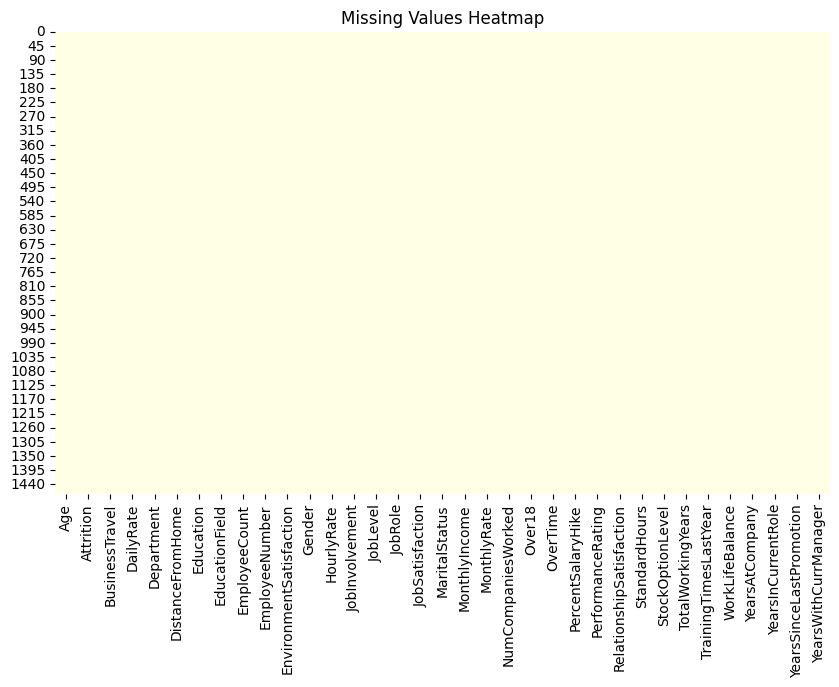

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='YlOrBr', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

 - #### **Find Duplicates:**

In [ ]:
# Find Duplicates
duplicates_row = df[df.duplicated()]

 - #### **Print Duplicate Rows:**

In [ ]:
# Print Duplicate Rows
print("Duplicates Rows:")
print(duplicates_row)

Duplicates Rows:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []


 - #### **Remove duplicates:**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

 - #### **Encode categorical variables:**

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

 - #### **Check the shape of the dataset after removing duplicates:**

In [ ]:
# Check the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates: ", df.shape)

Shape of the dataset after removing duplicates:  (1470, 35)


### **Step 2: Exploratory Data Analysis (EDA):**
   - #### **Set the style of seaborn plots:**

In [ ]:
# Set the style of seaborn plots
sns.set(style="darkgrid")

 - #### **Age Distribution with value counts:**

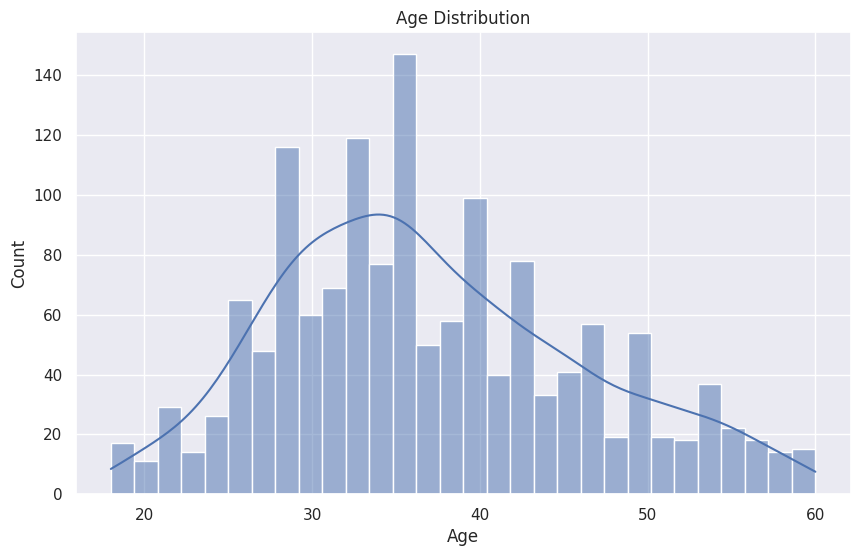

In [ ]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

 - #### **Age distribution by Attrition:**

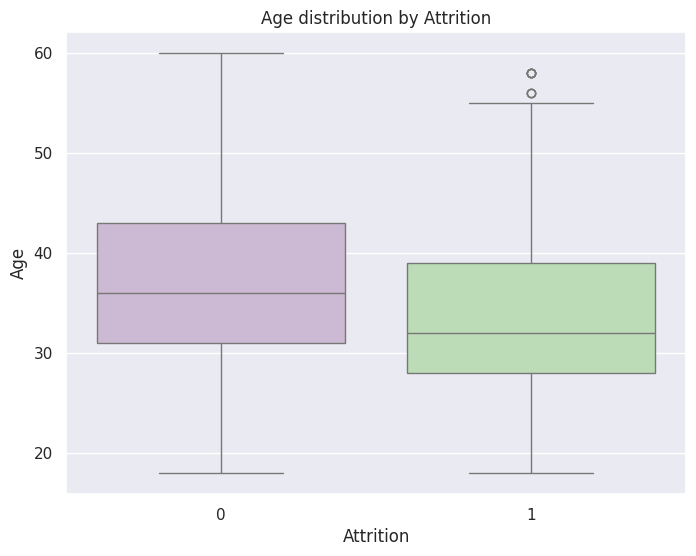

In [ ]:
# Age distribution by Attrition
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="Age", data=df, palette="PRGn")
plt.title("Age distribution by Attrition")
plt.show()

- #### **Attrition count with value counts:**

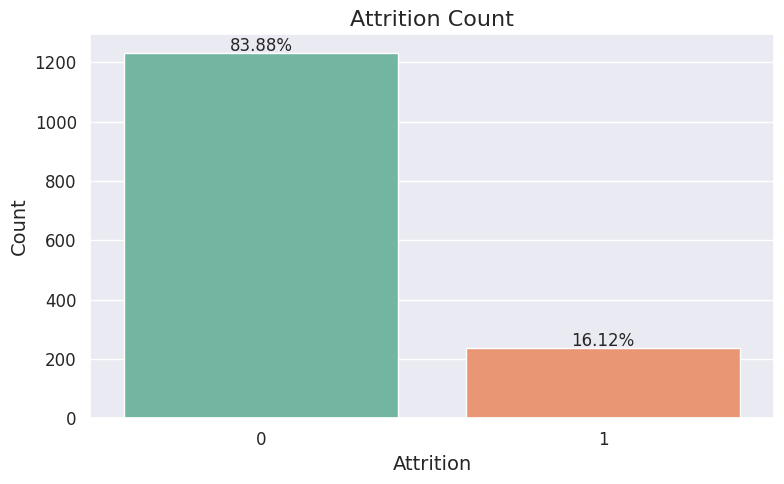

In [ ]:
# Attrition count with value counts
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df, x = "Attrition", palette="Set2")

# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

# Customizing the plot
plt.title("Attrition Count", fontsize=16)
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

 - #### **Attrition by Department:**

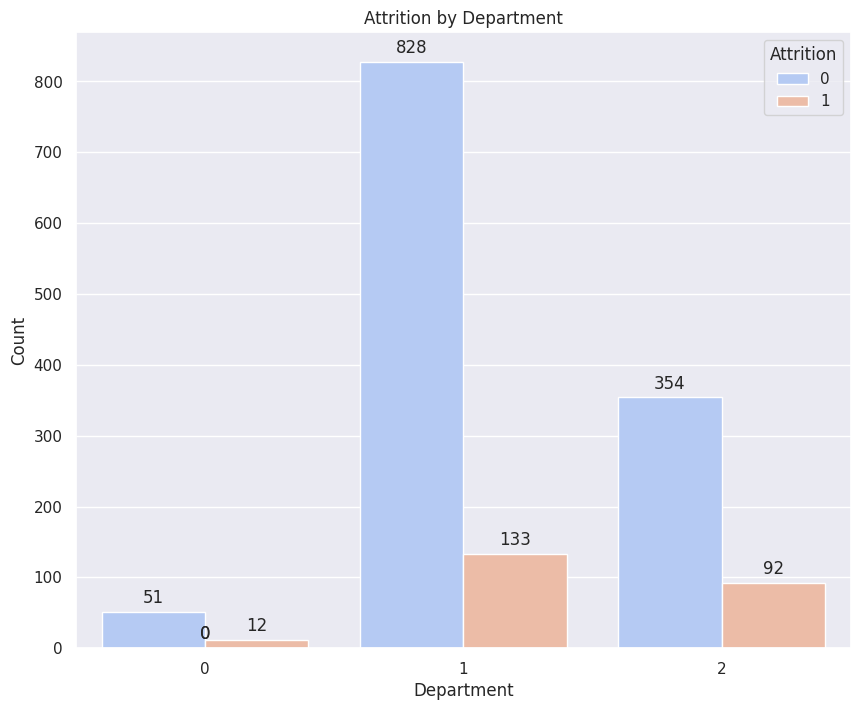

In [ ]:
# Attrition by Department
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df, x = "Department", hue="Attrition", palette="coolwarm")

# Add value counts on top of each her
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

 - #### **Attrition by Business Travel:**

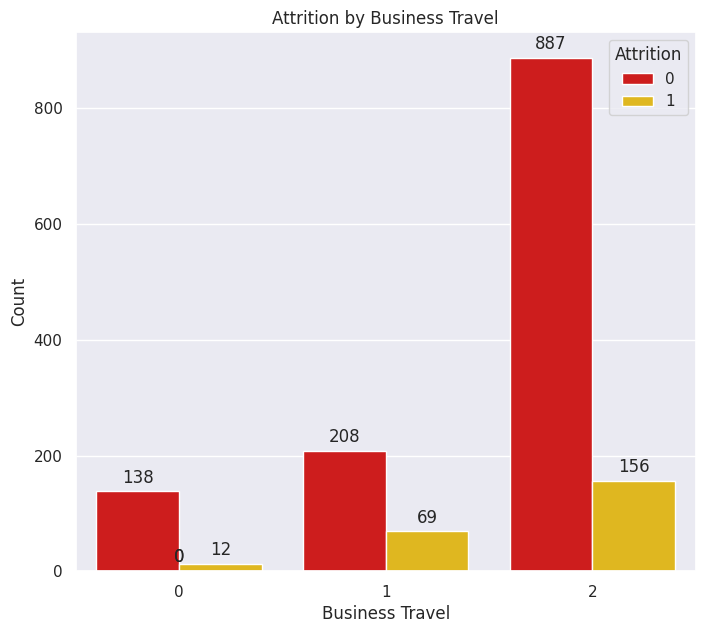

In [ ]:
# Attrition by Business Travel
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette="hot")
# Add value counts on top of each her
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

 - #### **Monthly Income distribution by Attrition:**

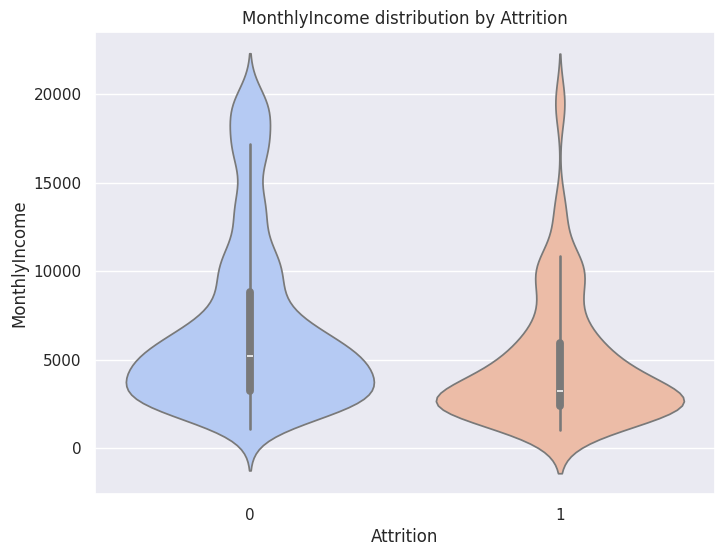

In [ ]:
# Monthly Income distribution by Attrition
plt.figure(figsize=(8, 6))
sns.violinplot(x='Attrition', y='MonthlyIncome', data=df, palette="coolwarm")
plt.title('MonthlyIncome distribution by Attrition')
plt.show()

 - #### **Job Level by Attrition:**

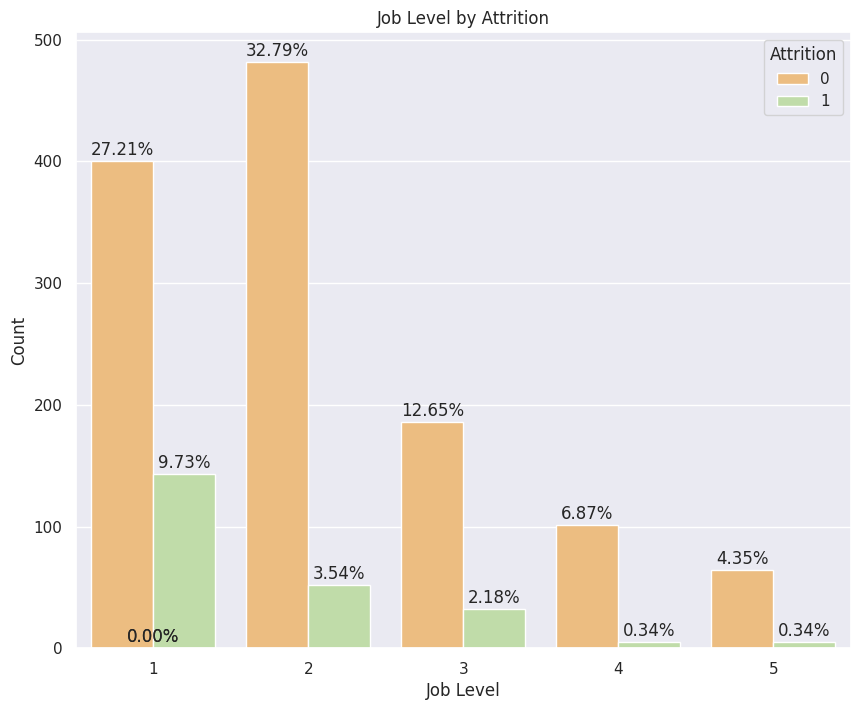

In [ ]:
# Job Level by Attrition
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='JobLevel', hue='Attrition', data=df, palette="Spectral")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

plt.title('Job Level by Attrition')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

 - #### **Attrition by Education Field:**

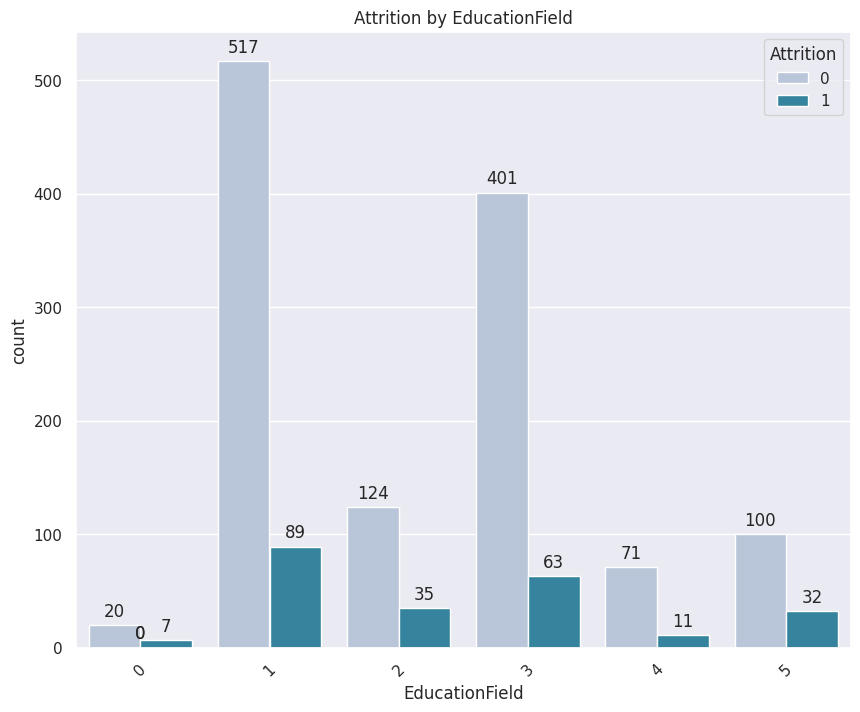

In [ ]:
# Attrition by Education Field
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='EducationField', hue='Attrition', data=df, palette="PuBuGn")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by EducationField')
plt.xticks(rotation=45)
plt.show()

 - #### **Attrition by Job Role:**

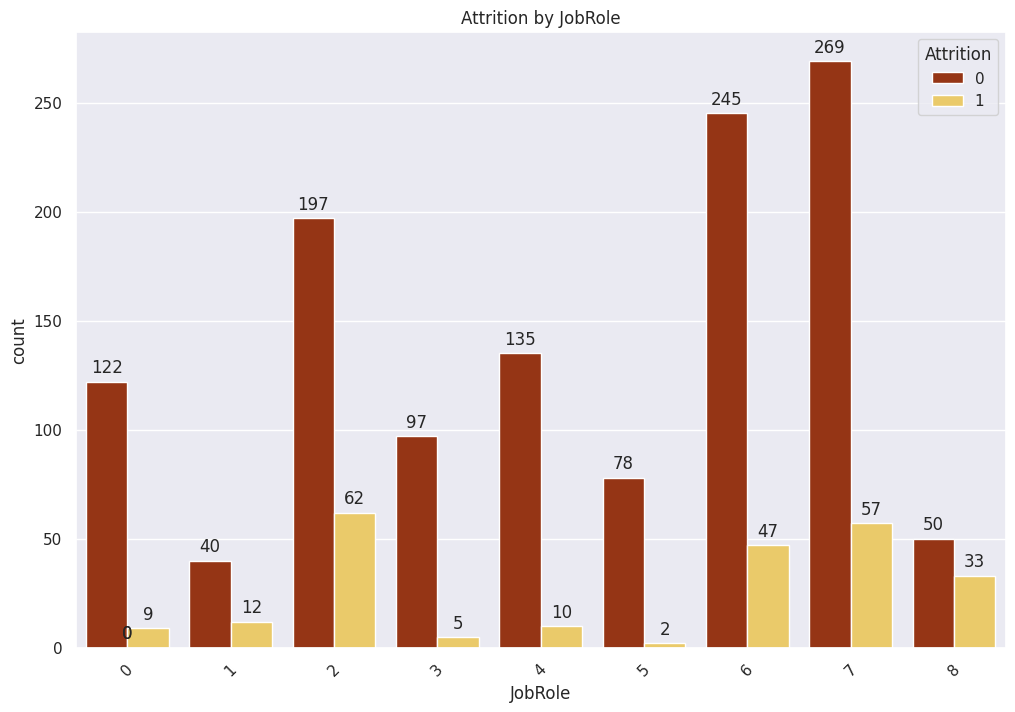

In [ ]:
# Attrition by JobRole
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='JobRole', hue='Attrition', data=df, palette="afmhot")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by JobRole')
plt.xticks(rotation=45)
plt.show()

 - #### **Attrition by Marital Status:**

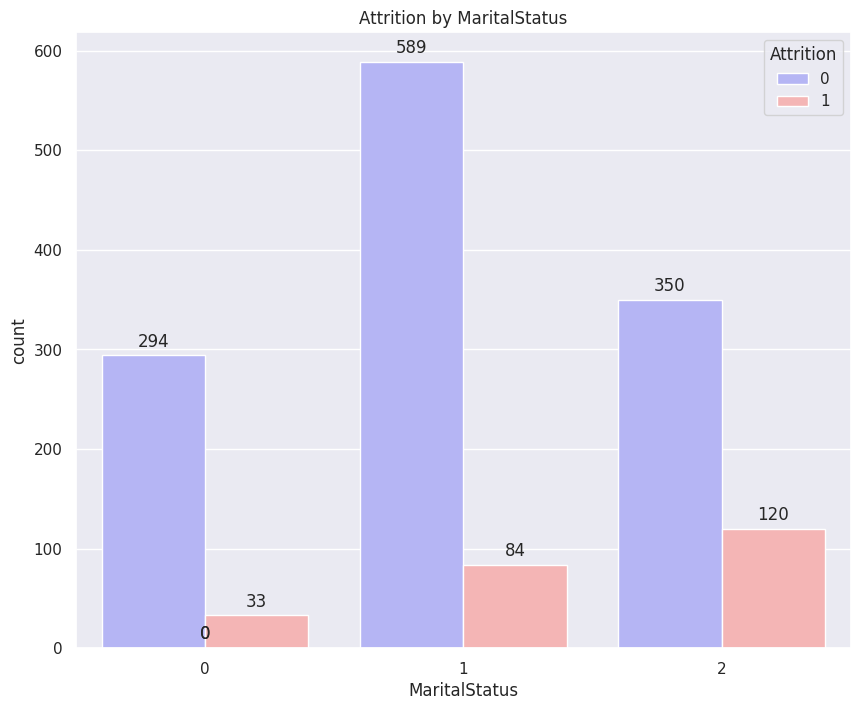

In [ ]:
# Attrition by Marital Status
plt.figure(figsize=(10, 8))
ax= sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette="bwr")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by MaritalStatus')
plt.show()

 - #### **Attrition by Over Time:**

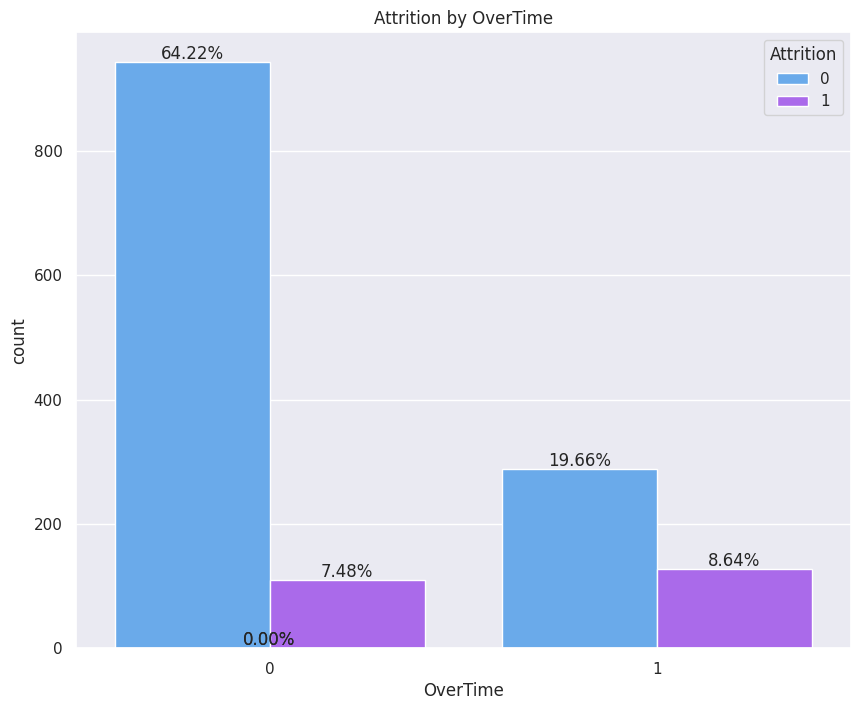

In [ ]:
# Attrition by Over Time
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='OverTime', hue='Attrition', data=df, palette="cool")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

plt.title('Attrition by OverTime')
plt.show()

 - #### **Attrition by Environment Satisfaction:**

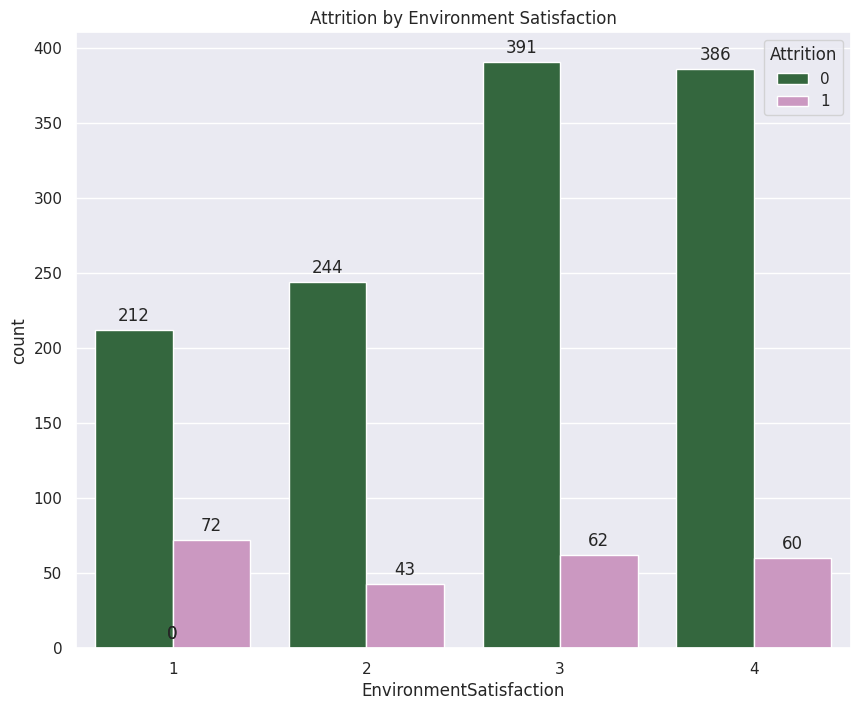

In [ ]:
#Attrition by Environment Satisfaction
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette="cubehelix")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Environment Satisfaction')
plt.show()

- #### **Attrition by Job Satisfaction:**

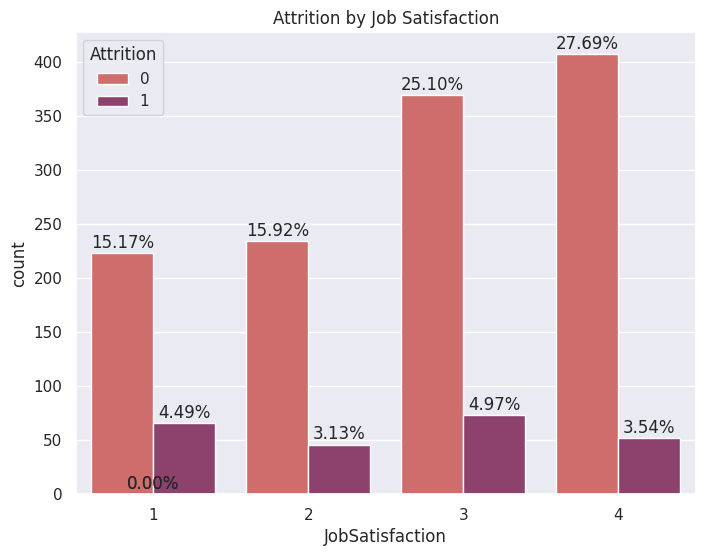

In [ ]:
# Attrition by Job Satisfaction
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette="flare")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
plt.title('Attrition by Job Satisfaction')
plt.show()


 - #### **Attrition by Relationship Satisfaction:**

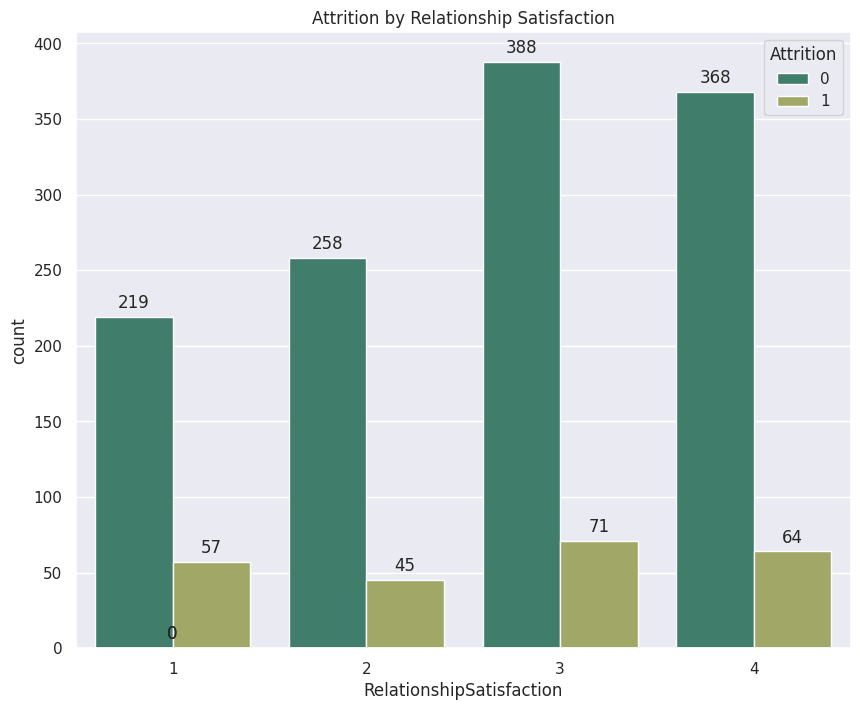

In [ ]:
# Attrition by Relationship Satisfaction
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette="gist_earth")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Relationship Satisfaction')
plt.show()

 - #### **Attrition by Work Life Balance:**

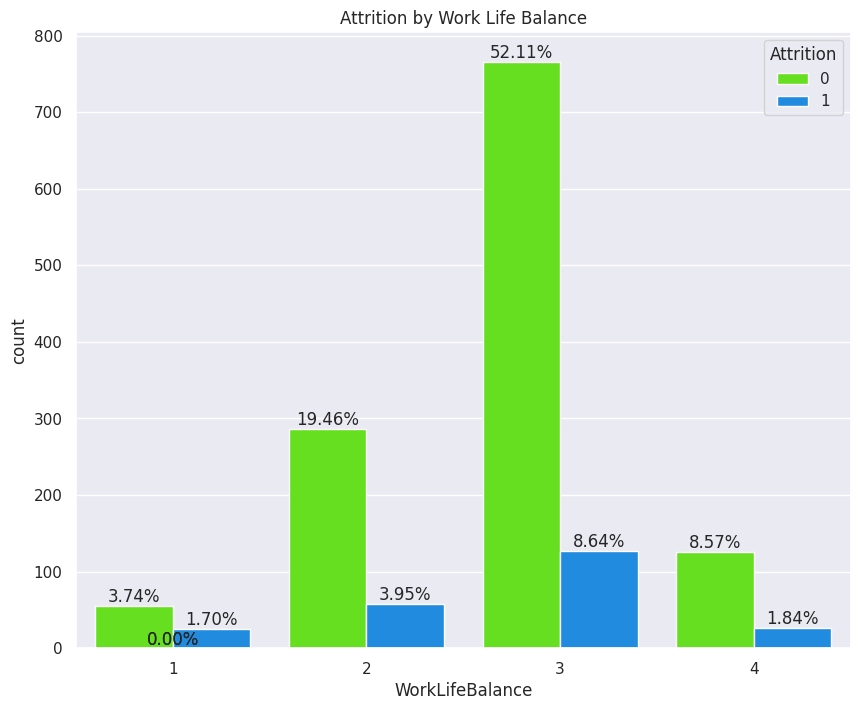

In [ ]:
# Attrition by Work Life Balance
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette="gist_rainbow")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
plt.title('Attrition by Work Life Balance')
plt.show()

 - #### **Scatter plot of Age vs. MonthlyIncome colored by Attrition**

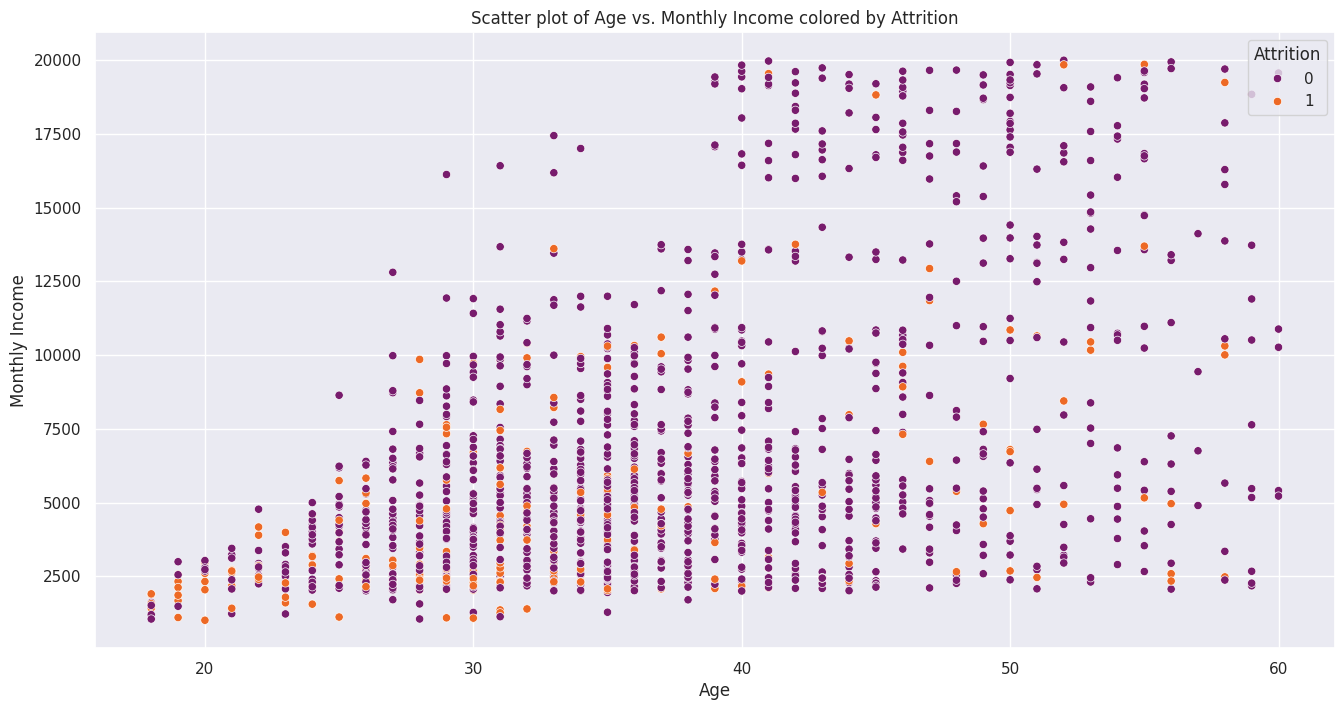

In [ ]:
# Scatter plot of Age vs. MonthlyIncome colored by Attrition
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df, palette="inferno")
plt.title('Scatter plot of Age vs. Monthly Income colored by Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', loc='upper right')
plt.show()

- #### **Pie chart of Department distribution:**

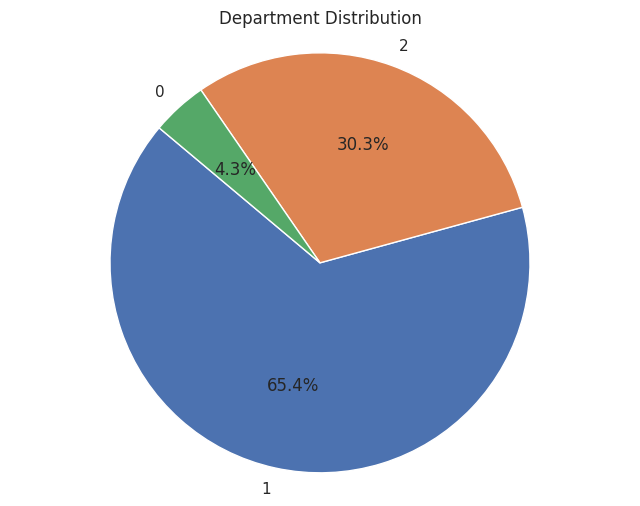

In [ ]:
# Pie chart of Department distribution
department_counts = df['Department'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Department Distribution')
plt.axis('equal')
plt.show()

### **Step 3: Model Selection and Training:**
  - #### **Split the data into features (X) and target (y):**

In [ ]:
# Step 3: Model Selection and Training
# Split the data into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

 - #### **Split data into training and testing sets:**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 - #### **Initialize and train the model (Example: Random Forest):**

In [ ]:
# Initialize and train the model (Example: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Step 4: Model Evaluation:**
  - #### **Predictions:**

In [ ]:
# Step 4: Model Evaluation
# Predictions
y_pred = model.predict(X_test)

 - #### **Accuracy Score:**

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100

# Print accuracy score
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 86.73%


 - #### **ROC AUC score**

In [ ]:
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred) * 100

# Print ROC AUC score
print("ROC AUC Score: {:.2f}%".format(roc_auc))

ROC AUC Score: 54.34%


 - #### **Confusion Matrix:**

In [ ]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[251   4]
 [ 35   4]]


 - #### **Classification Report:**

In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



 - #### **Predict attrition for the entire dataset:**

In [ ]:
# Predict attrition for the entire dataset
entire_data_attrition_predict = model.predict(X)

 - #### **Count the number of employees predicted to leave the company (attrition = 1):**

In [ ]:
# Count the number of employees predicted to leave the company (attrition = 1)
num_leave_company = sum(entire_data_attrition_predict)

 - #### **Display the number of employees predicted to leave the company:**

In [ ]:
# Display the number of employees predicted to leave the company
print("Number of employees predicted to leave the company:", num_leave_company)

Number of employees predicted to leave the company: 206


### **Now Model Predict - new data:**
  - #### **Create new data with all features**

In [ ]:

# Create new data with all features
new_data = pd.DataFrame({
    'Age': [30],  # Example age
    'BusinessTravel': ['Travel_Rarely'],  # Example business travel type
    'DailyRate': [500],  # Example daily rate
    'Department': ['Research & Development'],  # Example department
    'DistanceFromHome': [10],  # Example distance from home
    'Education': [3],  # Example education level
    'EducationField': ['Life Sciences'],  # Example education field
    'EmployeeCount': [1],  # Example employee count
    'EmployeeNumber': [1500],  # Example employee number
    'EnvironmentSatisfaction': [2],  # Example environment satisfaction level
    'Gender': ['Female'],  # Example gender
    'HourlyRate': [50],  # Example hourly rate
    'JobInvolvement': [3],  # Example job involvement level
    'JobLevel': [2],  # Example job level
    'JobRole': ['Research Scientist'],  # Example job role
    'JobSatisfaction': [3],  # Example job satisfaction level
    'MaritalStatus': ['Single'],  # Example marital status
    'MonthlyIncome': [4000],  # Example monthly income
    'MonthlyRate': [10000],  # Example monthly rate
    'NumCompaniesWorked': [2],  # Example number of companies worked
    'Over18': ['Y'],  # Example over 18 indicator
    'OverTime': ['Yes'],  # Example overtime indicator
    'PercentSalaryHike': [15],  # Example percent salary hike
    'PerformanceRating': [3],  # Example performance rating
    'RelationshipSatisfaction': [2],  # Example relationship satisfaction level
    'StandardHours': [80],  # Example standard hours
    'StockOptionLevel': [1],  # Example stock option level
    'TotalWorkingYears': [8],  # Example total working years
    'TrainingTimesLastYear': [2],  # Example training times last year
    'WorkLifeBalance': [3],  # Example work-life balance level
    'YearsAtCompany': [4],  # Example years at company
    'YearsInCurrentRole': [2],  # Example years in current role
    'YearsSinceLastPromotion': [1],  # Example years since last promotion
    'YearsWithCurrManager': [2]  # Example years with current manager
})

 - #### **Encode categorical variables in new data:**

In [ ]:
# Encode categorical variables in new data
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = label_encoders[column].transform(new_data[column])

 - #### **Predict attrition for new_data:**

In [ ]:
# Predict attrition for new data
attrition_prediction = model.predict(new_data)

 - #### **Display the result of attrition:**

In [ ]:
# Display the result of attrition
if len(attrition_prediction) > 0:
    print("Attrition prediction for the employee:", attrition_prediction[0])
else:
    print("No attrition prediction available.")

Attrition prediction for the employee: 0
